# Holocene Ice Window Increment

In [1]:
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import ammonyte as amt
import seaborn as sns
import pandas as pd

from pylipd.lipd import LiPD

In [2]:
#We suppress warnings for these notebooks for presentation purposes. Best practice is to not do this though.
import warnings
warnings.filterwarnings('ignore')

In [3]:
color_list = sns.color_palette('colorblind')

In [4]:
lipd_path = './data/8k_ice'

all_files = LiPD()

if __name__=='__main__':
    all_files.load_from_dir(lipd_path)

record_names = all_files.get_all_dataset_names()

Loading 8 LiPD files


  0%|                                                     | 0/8 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 74.36it/s]

100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 73.93it/s]

Loaded..


In [5]:
series_list = []

# We specify the indices of interest in each dataframe by hand here

index_dict = {
    'GRIP.GRIP.1992' : 'd18O',
    'Renland.Johnsen.1992' : 'd18O',
    'EDML.Stenni.2010' : 'bagd18O',
    'EPICADomeC.Stenni.2010' : 'bagd18O',
    'Vostok.Vimeux.2002' : 'temperature',
    'GISP2.Grootes.1997' : 'd18O',
    'NGRIP.NGRIP.2004' : 'd18O',
    'TALDICE.Mezgec.2017' : 'd18O',
}

for record in record_names:
    d = LiPD()
    d.load(f'{lipd_path}/{record}.lpd')
    df = d.get_timeseries_essentials()
    row = df[df['paleoData_variableName']==index_dict[record]][df['time_variableName']=='age']
    lat = row['geo_meanLat'].to_numpy()[0]
    lon = row['geo_meanLon'].to_numpy()[0]
    elevation = row['geo_meanElev'].to_numpy()[0]
    value = row['paleoData_values'].to_numpy()[0]
    value_name = row['paleoData_variableName'].to_numpy()[0]
    value_unit = row['paleoData_units'].to_numpy()[0]
    time = row['time_values'].to_numpy()[0]
    time_unit = row['time_units'].to_numpy()[0]
    time_name = row['time_variableName'].to_numpy()[0]
    label = row['dataSetName'].to_numpy()[0]
    geo_series = pyleo.GeoSeries(time=time,
                                 value=value,
                                 lat=lat,
                                 lon=lon,
                                 elevation=elevation,
                                 time_unit=time_unit,
                                 time_name=time_name,
                                 value_name=value_name,
                                 value_unit=value_unit,
                                 label=label,
                                 archiveType='ice')
    series_list.append(geo_series)

geo_ms = pyleo.MultipleGeoSeries(series_list)

Loading 1 LiPD files


  0%|                                                     | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 93.94it/s]

Loaded..


NaNs have been detected and dropped.
Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                     | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 47.49it/s]

Loaded..


Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                     | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 68.92it/s]

Loaded..


NaNs have been detected and dropped.
Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                     | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 74.68it/s]

Loaded..


Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                     | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 70.76it/s]

Loaded..


NaNs have been detected and dropped.
Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                     | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 75.85it/s]

Loaded..
NaNs have been detected and dropped.
Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                     | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 82.18it/s]

Loaded..


Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                     | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 80.28it/s]

Loaded..


NaNs have been detected and dropped.
Time axis values sorted in ascending order


In [6]:
ms_list = []

for series in geo_ms.series_list:
    if series.lat > 0 or series.label == 'EPICADomeC.Stenni.2010':
        series.time_unit = 'Years BP'
        ms_list.append(series)
        

(<Figure size 640x480 with 6 Axes>,
 {0: <Axes: ylabel='d18O [permil]'>,
  1: <Axes: ylabel='bagd18O [permil]'>,
  2: <Axes: ylabel='d18O [permil]'>,
  3: <Axes: ylabel='d18O [permil]'>,
  4: <Axes: ylabel='d18O [permil]'>,
  5: <Axes: xlabel='Age [Years BP]'>})

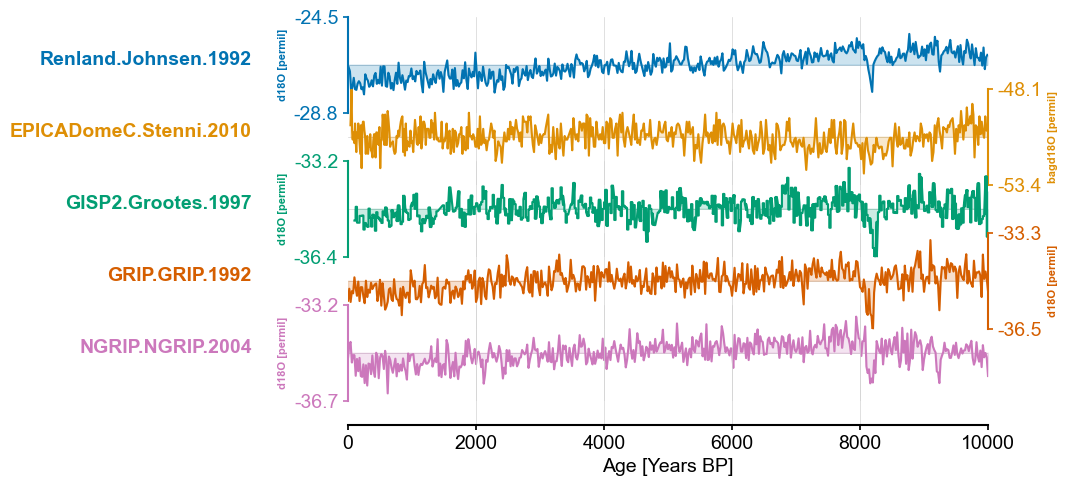

In [7]:
end_time = 10000

ms_ice = pyleo.MultipleSeries([series.slice((0,end_time)) for series in ms_list])
ms_ice.stackplot(colors=color_list[:len(ms_ice.series_list)])

In [8]:
m = 12
w_incre_list = np.arange(2,9,2)
res_dict = {}
lp_dict = {}

for idx,series in enumerate(ms_ice.series_list):
    name = series.label
    print(f'Analyzing {name}')
    for w_incre in tqdm(w_incre_list):
        series_slice = series.slice((0,end_time))
        td = amt.TimeEmbeddedSeries(series=series.slice((0,end_time)),m=m) #Tau is selected via first minimum of mutual info
        eps = td.find_epsilon(eps=1,target_density=.05,tolerance=.01,verbose=False)
        rm = eps['Output']
        lp = rm.laplacian_eigenmaps(w_size=20,w_incre=w_incre)
        
        if name not in res_dict:
            res_dict[name] = []
        if name not in lp_dict:
            lp_dict[name] = []

        lp_dict[name].append(lp)

Analyzing Renland.Johnsen.1992


  0%|                                                     | 0/4 [00:00<?, ?it/s]

 25%|███████████▎                                 | 1/4 [00:02<00:06,  2.10s/it]

 50%|██████████████████████▌                      | 2/4 [00:02<00:02,  1.23s/it]

 75%|█████████████████████████████████▊           | 3/4 [00:03<00:01,  1.23s/it]

100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.23s/it]

100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.30s/it]

Analyzing EPICADomeC.Stenni.2010


  0%|                                                     | 0/4 [00:00<?, ?it/s]

 25%|███████████▎                                 | 1/4 [00:00<00:02,  1.00it/s]

 50%|██████████████████████▌                      | 2/4 [00:02<00:02,  1.09s/it]

 75%|█████████████████████████████████▊           | 3/4 [00:03<00:01,  1.22s/it]

100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.07it/s]

100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.00s/it]

Analyzing GISP2.Grootes.1997


  0%|                                                     | 0/4 [00:00<?, ?it/s]

 25%|███████████▎                                 | 1/4 [00:02<00:06,  2.21s/it]

 50%|██████████████████████▌                      | 2/4 [00:03<00:03,  1.80s/it]

 75%|█████████████████████████████████▊           | 3/4 [00:04<00:01,  1.52s/it]

100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.33s/it]

100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.49s/it]

Analyzing GRIP.GRIP.1992


  0%|                                                     | 0/4 [00:00<?, ?it/s]

 25%|███████████▎                                 | 1/4 [00:06<00:18,  6.18s/it]

 50%|██████████████████████▌                      | 2/4 [00:10<00:10,  5.20s/it]

 75%|█████████████████████████████████▊           | 3/4 [00:14<00:04,  4.63s/it]

100%|█████████████████████████████████████████████| 4/4 [00:18<00:00,  4.23s/it]

100%|█████████████████████████████████████████████| 4/4 [00:18<00:00,  4.56s/it]

Analyzing NGRIP.NGRIP.2004


  0%|                                                     | 0/4 [00:00<?, ?it/s]

 25%|███████████▎                                 | 1/4 [00:00<00:02,  1.06it/s]

 50%|██████████████████████▌                      | 2/4 [00:01<00:01,  1.29it/s]

 75%|█████████████████████████████████▊           | 3/4 [00:02<00:00,  1.47it/s]

100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.50it/s]

0it [00:00, ?it/s]

1it [00:02,  2.44s/it]

2it [00:04,  2.45s/it]

3it [00:07,  2.45s/it]

4it [00:09,  2.43s/it]

4it [00:09,  2.44s/it]

Text(0.5, 0.98, 'Renland.Johnsen.1992')

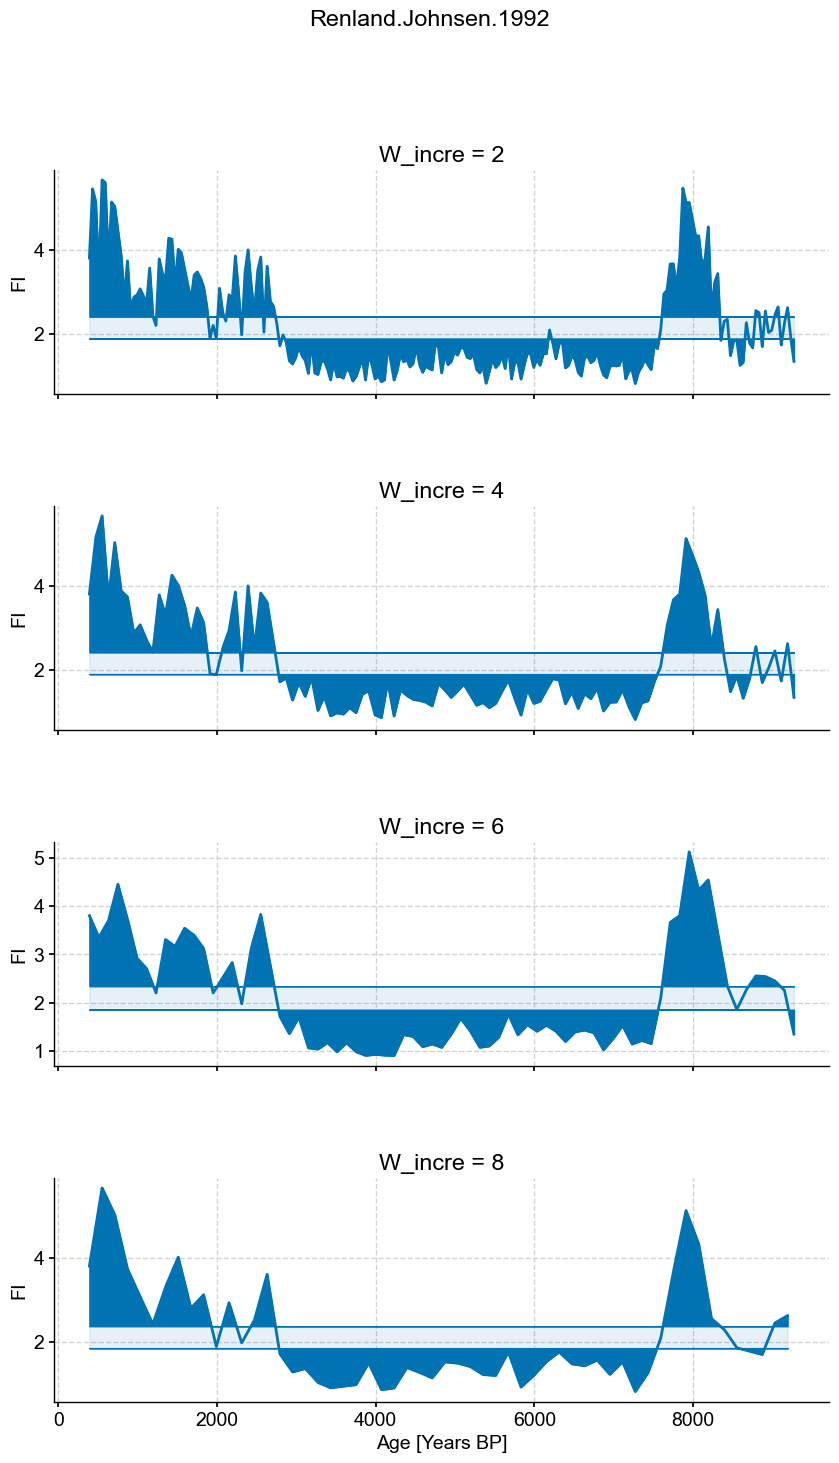

In [9]:
name = ms_list[0].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

0it [00:00, ?it/s]

1it [00:02,  2.45s/it]

2it [00:04,  2.43s/it]

3it [00:07,  2.42s/it]

4it [00:09,  2.37s/it]

4it [00:09,  2.39s/it]

Text(0.5, 0.98, 'EPICADomeC.Stenni.2010')

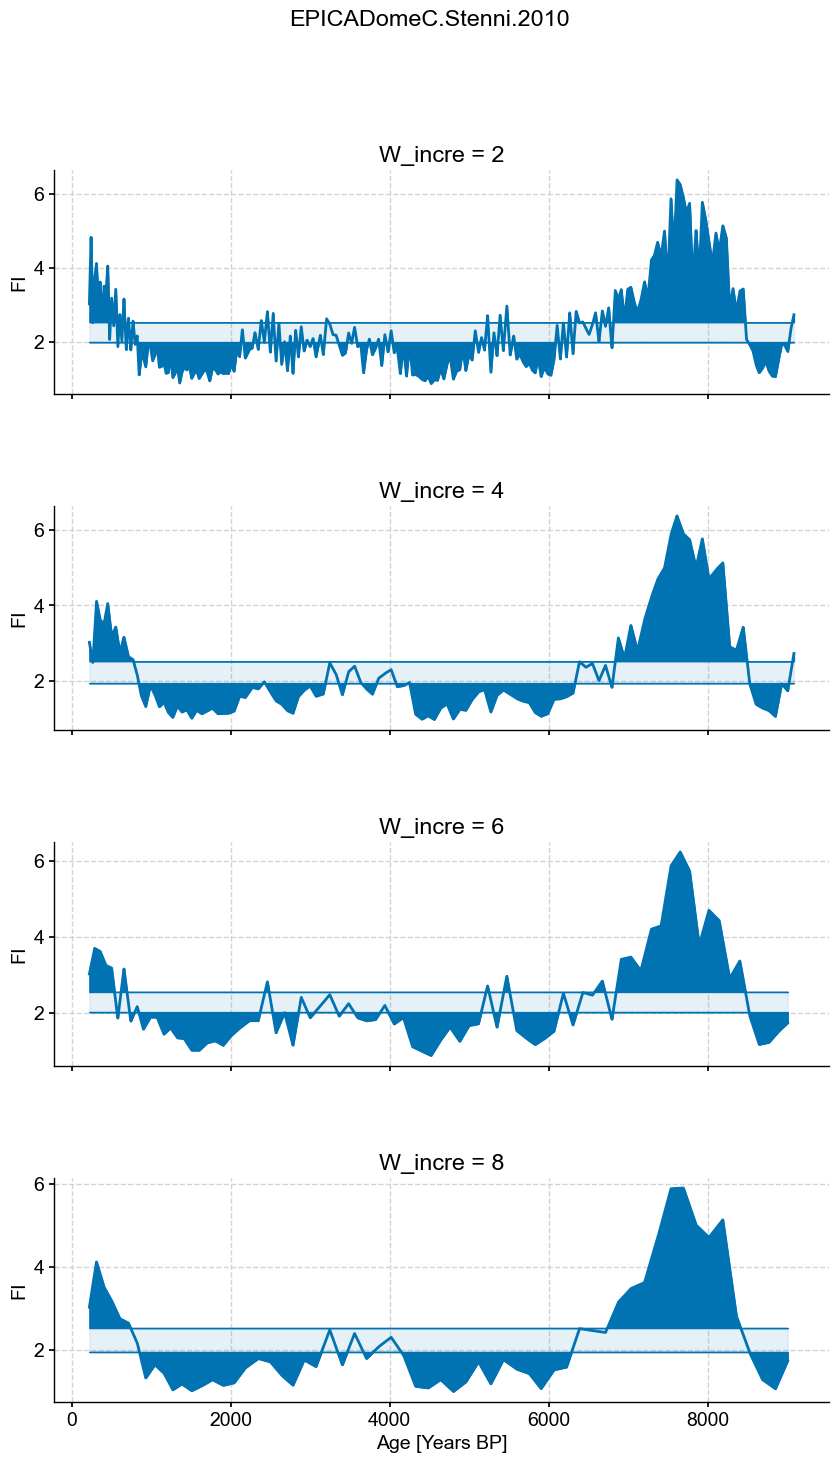

In [10]:
name = ms_list[1].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

0it [00:00, ?it/s]

1it [00:02,  2.44s/it]

2it [00:04,  2.42s/it]

3it [00:07,  2.40s/it]

4it [00:09,  2.39s/it]

4it [00:09,  2.40s/it]

Text(0.5, 0.98, 'GISP2.Grootes.1997')

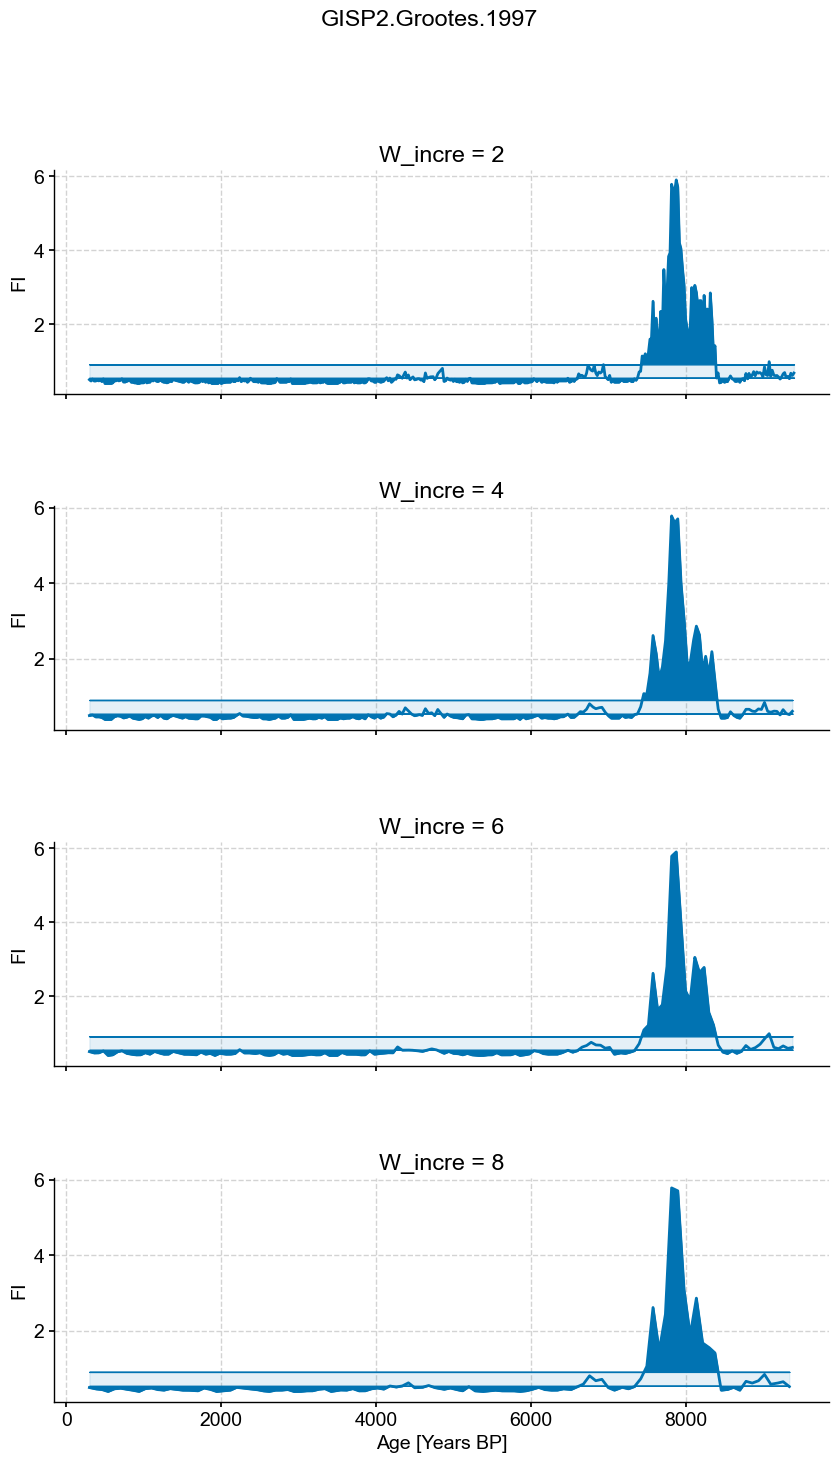

In [11]:
name = ms_list[2].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

0it [00:00, ?it/s]

1it [00:02,  2.55s/it]

2it [00:05,  2.56s/it]

3it [00:07,  2.56s/it]

4it [00:10,  2.56s/it]

4it [00:10,  2.56s/it]

Text(0.5, 0.98, 'GRIP.GRIP.1992')

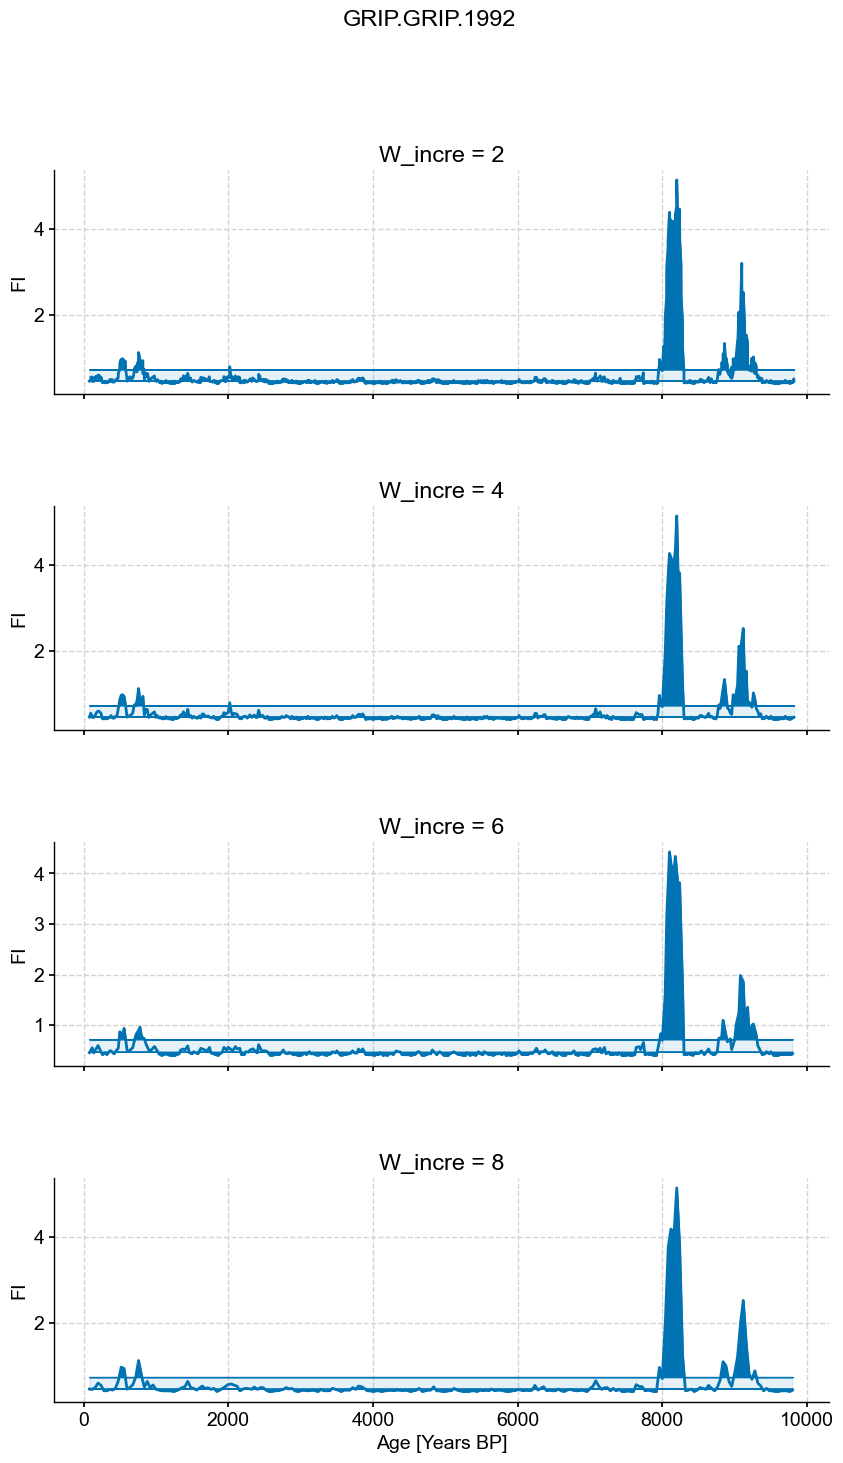

In [12]:
name = ms_list[3].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

0it [00:00, ?it/s]

1it [00:02,  2.20s/it]

2it [00:04,  2.19s/it]

3it [00:06,  2.19s/it]

4it [00:08,  2.18s/it]

4it [00:08,  2.18s/it]

Text(0.5, 0.98, 'NGRIP.NGRIP.2004')

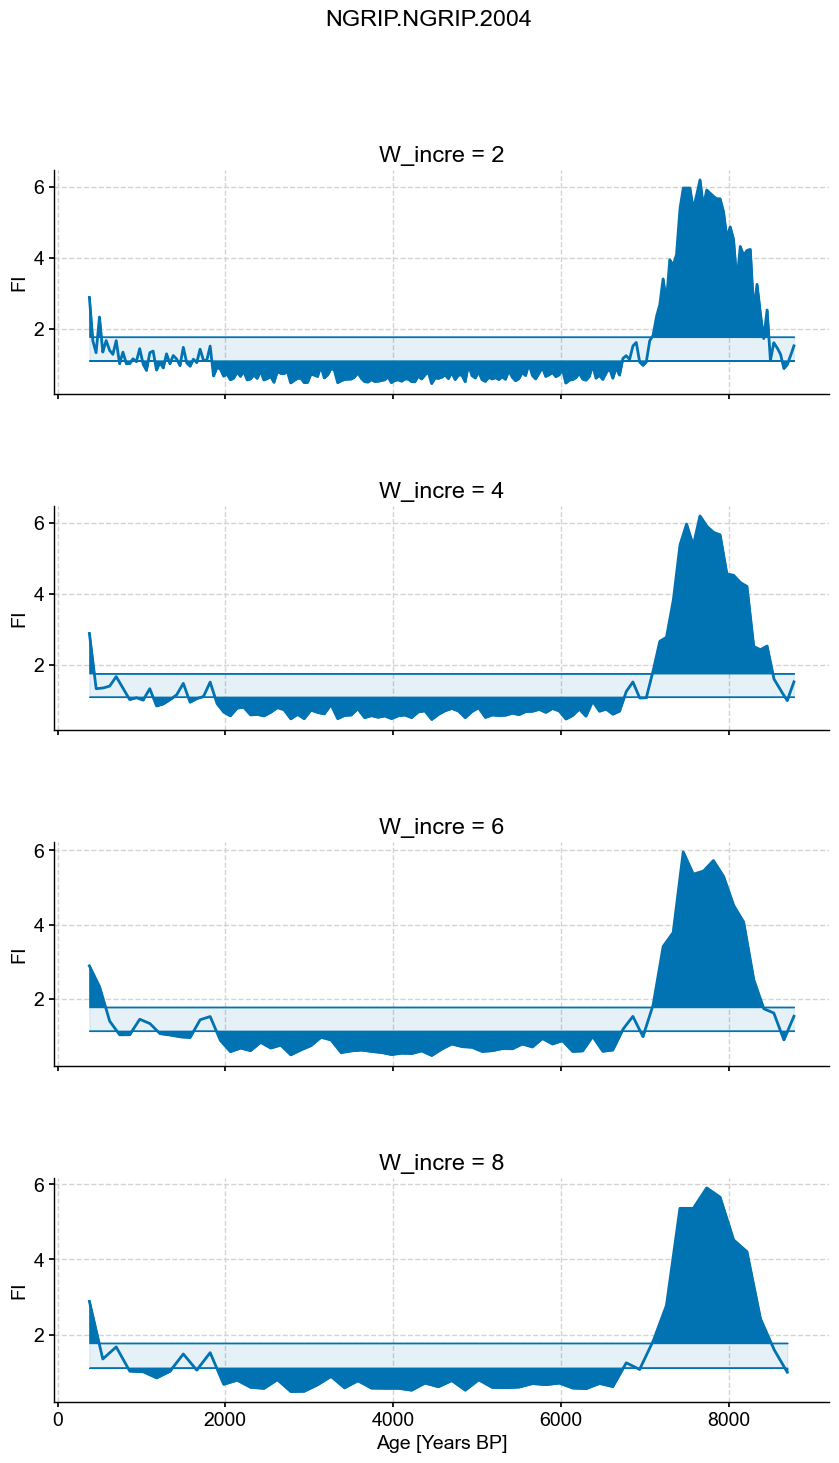

In [13]:
name = ms_list[4].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)